In [36]:
import numpy as np
import pandas as pd
from IPython.display import display
import os
from ml_util_functions import *
from ml_functions import *
import ast

SEED = 42
TRAIN_TEST_SPLIT_RATIO = 0.3
n_splits = 10

## Import dataset and perform preprocessing

In [37]:
# Import the dataset and inspect
df = pd.read_csv("Framingham.csv")

#Import the info from feature selection and extraction
filename = "feature_info.csv"
directory = os.path.join(os.getcwd(), "csv_files")
# Read the DataFrame from the CSV file
feature_info_df = read_from_csv(filename, directory)

# get the column names
all_column_names = feature_info_df["all_column_headers"].dropna().tolist()
categorical_col_names = feature_info_df["all_categorical_values_headers"].dropna().tolist()
continuous_col_names = feature_info_df["all_continuous_values_headers"].dropna().tolist()
target_col_name = feature_info_df["target_label"].dropna().tolist()
selected_feature_names = feature_info_df["selected_feature_names"].dropna().tolist()

########### Display dataframe info ###########
                 Non-Null Count Data Type  Null Count
male                       4238     int64           0
age                        4238     int64           0
education                  4133   float64         105
currentSmoker              4238     int64           0
cigsPerDay                 4209   float64          29
BPMeds                     4185   float64          53
prevalentStroke            4238     int64           0
prevalentHyp               4238     int64           0
diabetes                   4238     int64           0
totChol                    4188   float64          50
sysBP                      4238   float64           0
diaBP                      4238   float64           0
BMI                        4219   float64          19
heartRate                  4237   float64           1
glucose                    3850   float64         388
TenYearCHD                 4238     int64           0

########### Display dataframe summ

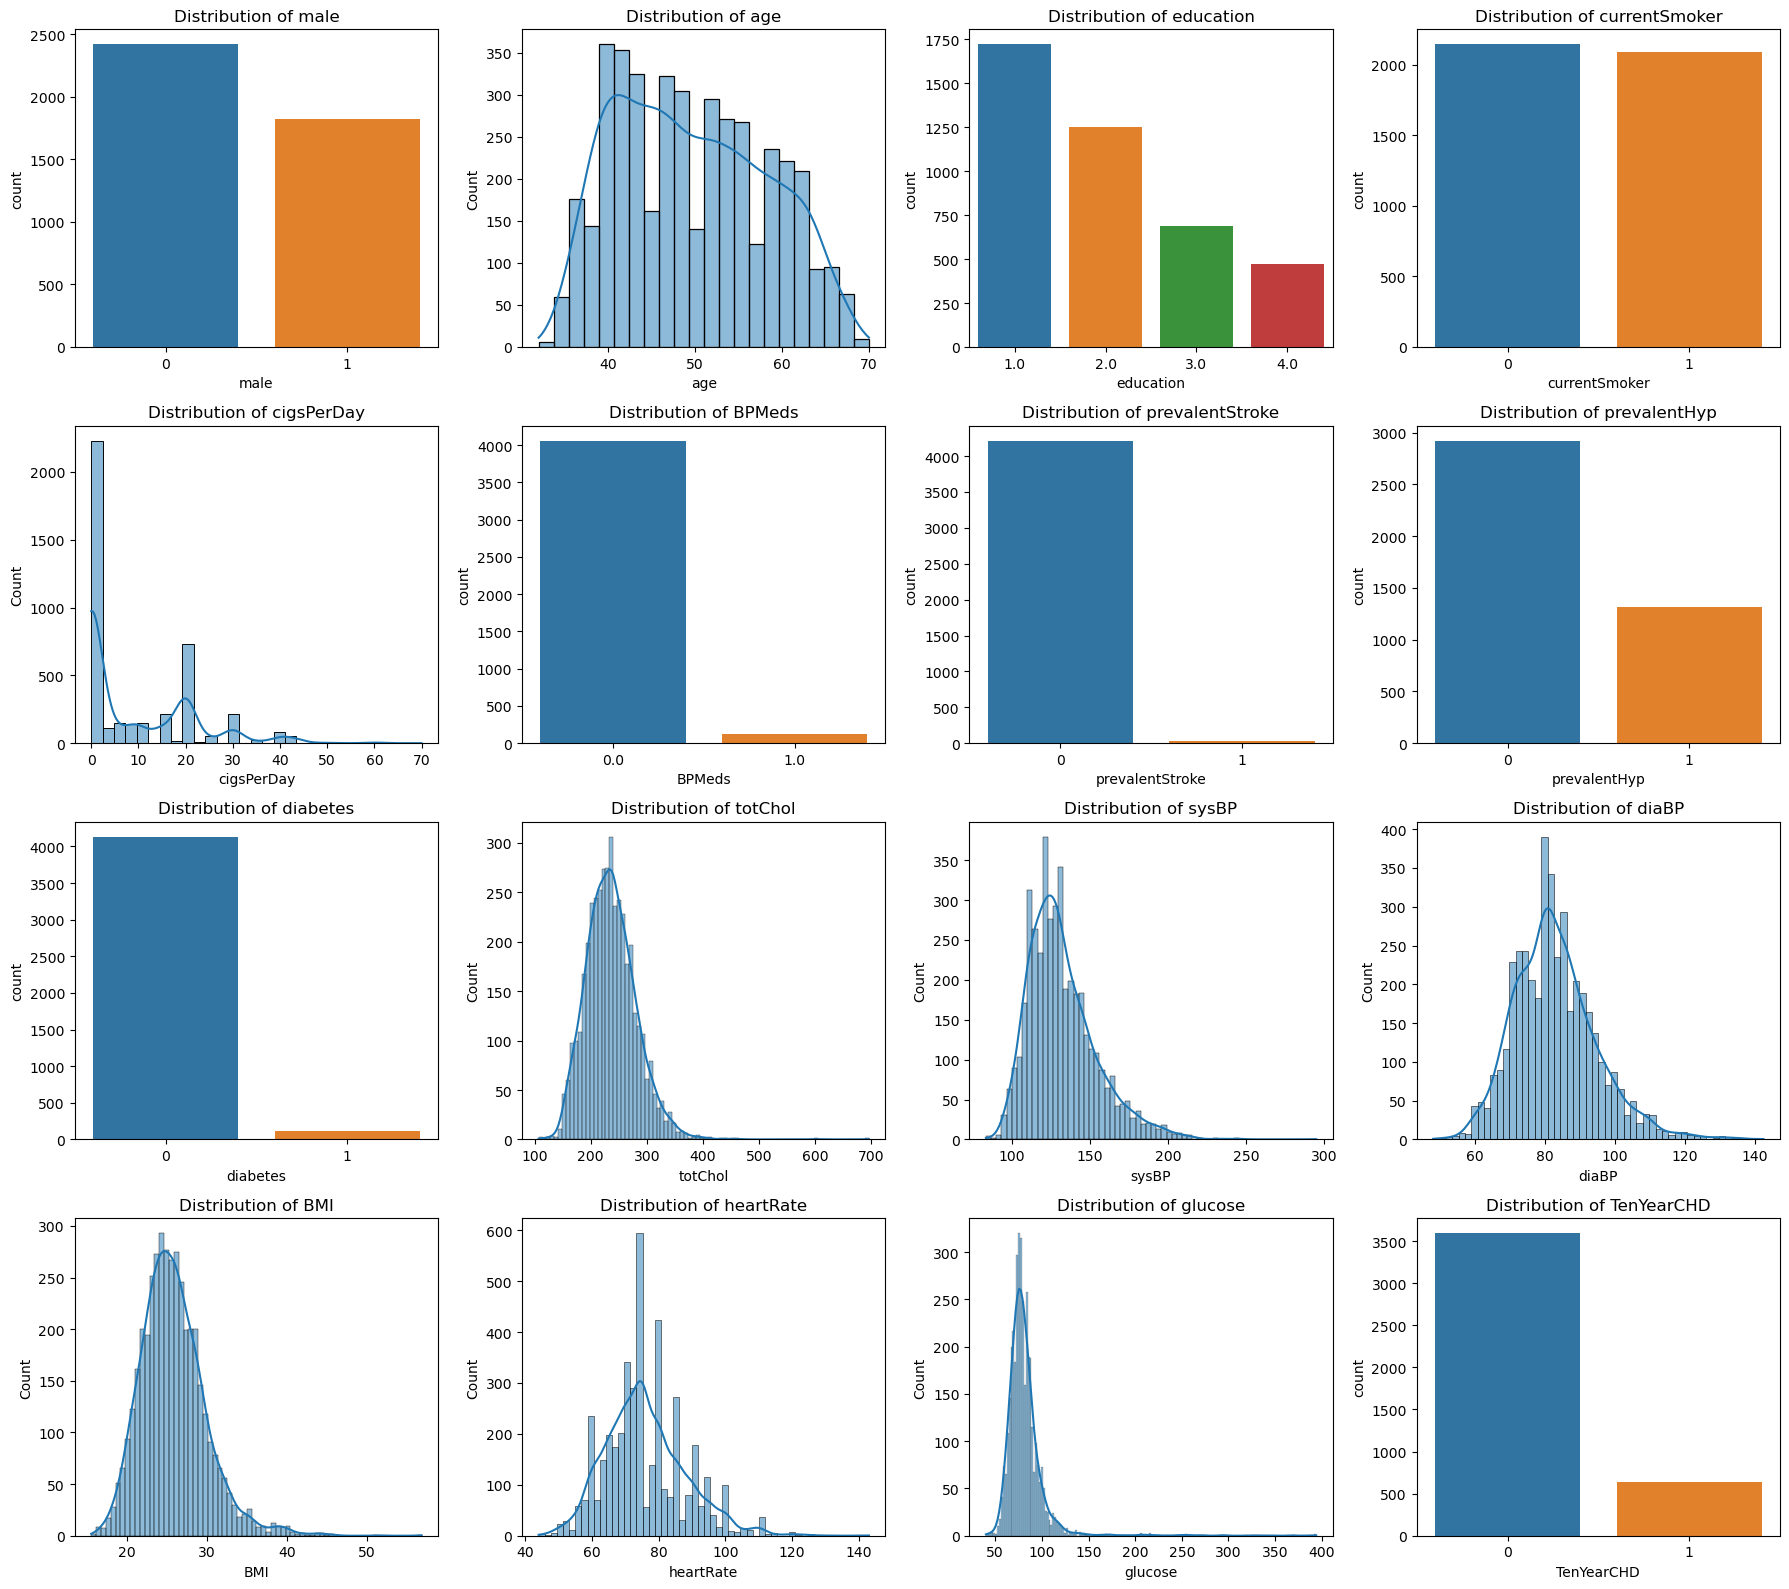

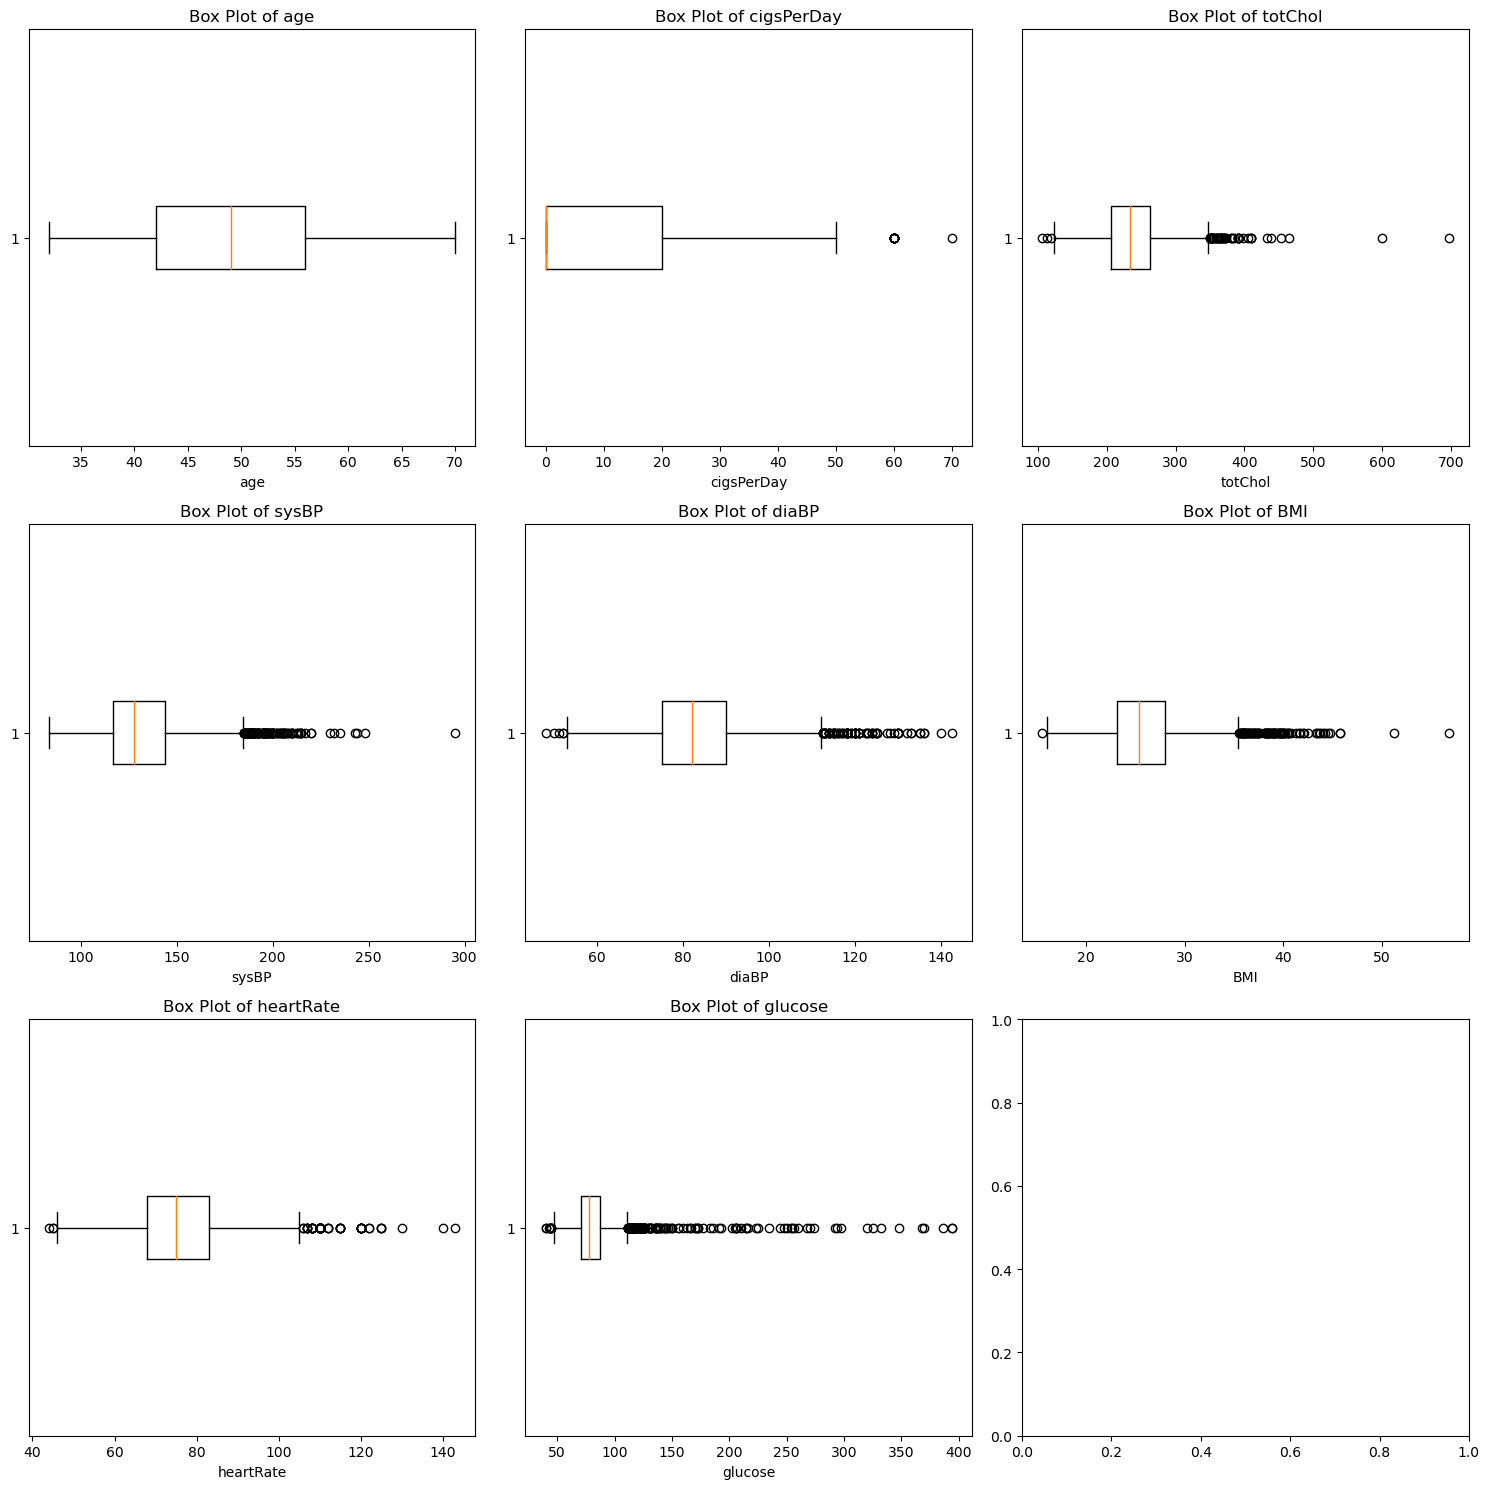

In [38]:
# show dataset info, data distribution and boxplot for continuous values
df_info(df)
plot_data_distribution(df)
show_boxplot(df, continuous_col_names)

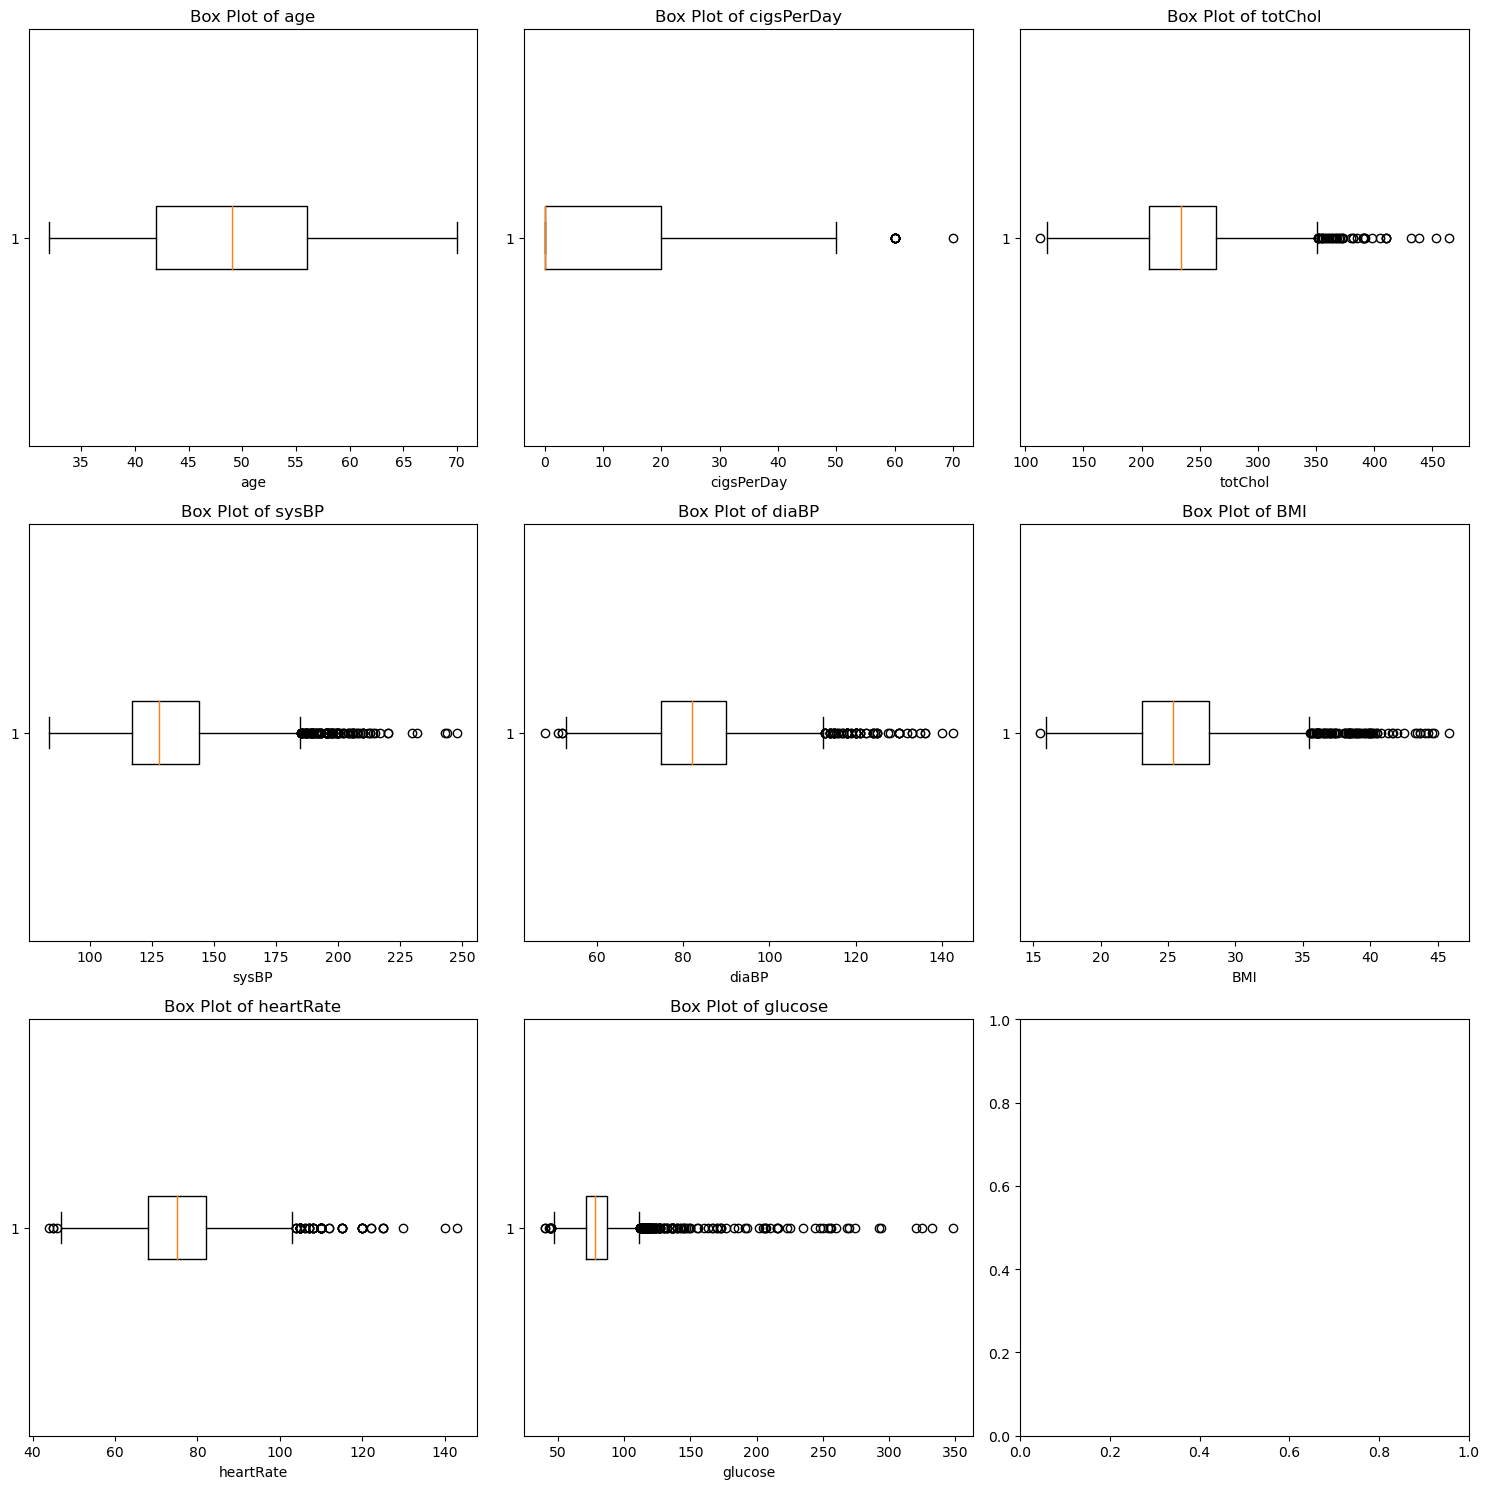

In [39]:
# remove outliers by visually confirming with boxplot method
df = remove_outliers_by_boxplot(df)
show_boxplot(df, continuous_col_names)

In [40]:
# impute the missing data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor

df_impute = df.copy()

# get all column headers in df
all_column_names = df.columns

# range of values for categorical data
categorical_data_range = {'male': [0, 1], 
                          'education': [1, 4], 
                          'currentSmoker': [0, 1], 
                          'BPMeds': [0, 1], 
                          'prevalentStroke': [0, 1], 
                          'prevalentHyp': [0, 1], 
                          'diabetes': [0, 1]}

# Imputer for categorical data
# categorical_imputer = SimpleImputer(strategy="mean")
categorical_imputer = KNNImputer()

# Imputer for continuous data
continuous_imputer_estimator = RandomForestRegressor()
continuous_imputer = IterativeImputer(estimator=continuous_imputer_estimator, random_state=SEED,max_iter=10)

mask_missing_vals, transformer, df_impute = impute_df(df_impute, categorical_imputer, continuous_imputer,
              all_column_names,categorical_col_names,continuous_col_names,
              categorical_data_range)

# show the dataset info after imputation
print("Data after imputation")
df_info(df_impute)

Data after imputation
########### Display dataframe info ###########
                 Non-Null Count Data Type  Null Count
male                       3816   float64           0
age                        3816   float64           0
education                  3816   float64           0
currentSmoker              3816   float64           0
cigsPerDay                 3816   float64           0
BPMeds                     3816   float64           0
prevalentStroke            3816   float64           0
prevalentHyp               3816   float64           0
diabetes                   3816   float64           0
totChol                    3816   float64           0
sysBP                      3816   float64           0
diaBP                      3816   float64           0
BMI                        3816   float64           0
heartRate                  3816   float64           0
glucose                    3816   float64           0
TenYearCHD                 3816     int64           0

########### 

/Users/yenaungkhant/miniforge3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


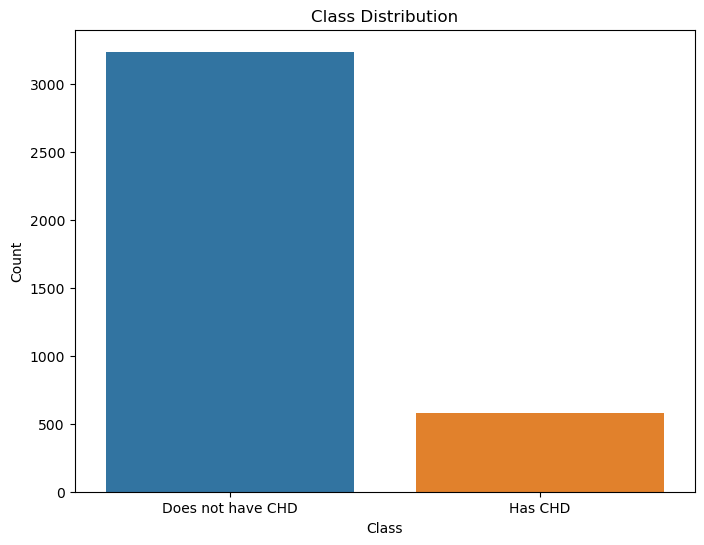

In [41]:
# show class distribution before sampling
plot_class_distribution(df_impute)

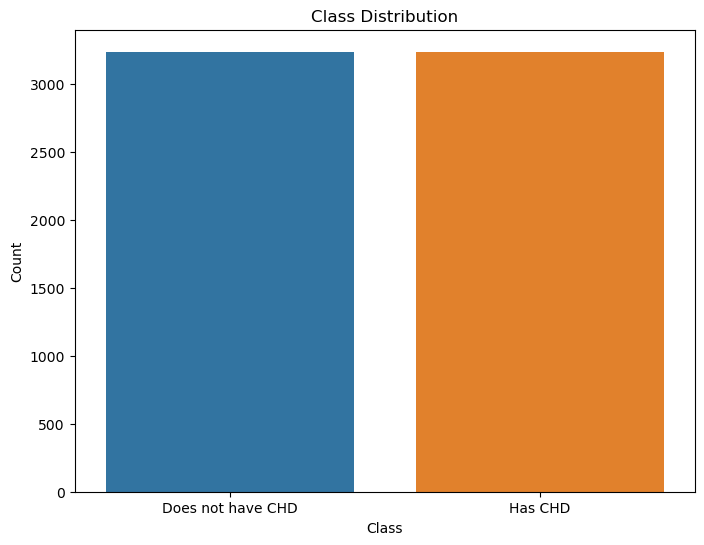

In [42]:
# perform oversampling
df_oversampled = smote_over_sampling(df_impute, categorical_col_names, sampling_strategy="minority", seed=SEED, k_neighbors=5)

# show class distribution after sampling
plot_class_distribution(df_oversampled)

In [43]:
# Split data into X and y and perform standard scaling
X_scaled, y_scaled = split_data_to_x_y(df_oversampled)

# get the scaler object
ct_scaler = custom_standard_scaler(X_scaled, continuous_col_names)
X_scaled = scale_data_using_custom_scaler(X_scaled, ct_scaler, categorical_col_names, continuous_col_names)

df_scaled = pd.concat([X_scaled, y_scaled], axis=1)

# show the dataset info after scaling
print("Data after imputation")
df_info(df_scaled)

Data after imputation
########### Display dataframe info ###########
                 Non-Null Count Data Type  Null Count
male                       6472   float64           0
age                        6472   float64           0
education                  6472   float64           0
currentSmoker              6472   float64           0
cigsPerDay                 6472   float64           0
BPMeds                     6472   float64           0
prevalentStroke            6472   float64           0
prevalentHyp               6472   float64           0
diabetes                   6472   float64           0
totChol                    6472   float64           0
sysBP                      6472   float64           0
diaBP                      6472   float64           0
BMI                        6472   float64           0
heartRate                  6472   float64           0
glucose                    6472   float64           0
TenYearCHD                 6472     int64           0

########### 

In [44]:
# Perform feature selection
df_selected = df_scaled[selected_feature_names].copy()

# Add the target column to the df_selected DataFrame using .loc
df_selected[target_col_name] = df_scaled[target_col_name]

# show the dataset info after scaling
print("Data after Feature Selection")
df_info(df_scaled)

Data after Feature Selection
########### Display dataframe info ###########
                 Non-Null Count Data Type  Null Count
male                       6472   float64           0
age                        6472   float64           0
education                  6472   float64           0
currentSmoker              6472   float64           0
cigsPerDay                 6472   float64           0
BPMeds                     6472   float64           0
prevalentStroke            6472   float64           0
prevalentHyp               6472   float64           0
diabetes                   6472   float64           0
totChol                    6472   float64           0
sysBP                      6472   float64           0
diaBP                      6472   float64           0
BMI                        6472   float64           0
heartRate                  6472   float64           0
glucose                    6472   float64           0
TenYearCHD                 6472     int64           0

#####

In [45]:
# import all libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import make_scorer, recall_score, confusion_matrix

# Compare all Model results using base models and tuned parameters

In [46]:
# evaluate model results and return the model
def evalute_and_return_model(X, y, model, n_splits, seed, show=True):
    # Perform k-fold cross-validation and get predicted labels for each fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)
    y_pred_cv = cross_val_predict(model, X, y, cv=skf)

    confusion_matrices = []

    # Calculate and store the confusion matrix for each fold
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        y_true_fold = y[test_index]
        y_pred_fold = y_pred_cv[test_index]
        cm_fold = confusion_matrix(y_true_fold, y_pred_fold)
        confusion_matrices.append(cm_fold)

    # Calculate the average confusion matrix across all folds
    average_confusion_matrix = np.mean(confusion_matrices, axis=0)

    # Calculate metrics directly from the average confusion matrix
    tn, fp, fn, tp = average_confusion_matrix.ravel()

    # Calculate the average accuracy
    average_accuracy = (tp + tn) / (tp + fp + fn + tn)

    # Calculate the average recall
    average_recall = tp / (tp + fn)

    # Calculate the average precision
    average_precision = tp / (tp + fp)

    # Calculate the average F1 score
    average_f1_score = 2 * tp / (2 * tp + fp + fn)

    if show:
        display_results(average_confusion_matrix, average_accuracy,
                    average_recall, average_precision,average_f1_score)

    # Fit the model on the full dataset before returning
    model.fit(X, y)

    return model

In [47]:
# get the model to be used and the hyperparameters

model_hyperparams = ast.literal_eval(feature_info_df["selected_hyperparameters"].dropna().tolist()[0])
print(f"The selected model is: {feature_info_df['selected_model'].dropna().tolist()}")

The selected model is: ['Extra Trees Classifier']


In [48]:
# The extra trees classifier will be selected as the model for the imputed data

# Split data for model to X_train and y_train
X_train, y_train = split_data_to_x_y(df_selected)

# create model
model = ExtraTreesClassifier(**model_hyperparams, random_state=SEED)

# evaluate and return the fitted model
model = evalute_and_return_model(X_train, y_train, model, 
                n_splits, SEED, show=True)

Average Confusion Matrix:
[[284.9  38.7]
 [ 22.4 301.2]]

Average Accuracy: 0.91
Average Recall: 0.93
Average Precision: 0.89
Average F1 Score: 0.91


In [49]:
# save the model, scaler and imputer as joblib
import joblib

directory = "models"

model_name = "extra_trees_model.joblib"
imputer_name = "data_imputer.joblib"
scaler_name = "standard_scaler.joblib"

joblib.dump(model, os.path.join(directory, model_name))
joblib.dump(transformer, os.path.join(directory, imputer_name))
joblib.dump(ct_scaler, os.path.join(directory, scaler_name))


['models/standard_scaler.joblib']

In [50]:
import pickle

pickle.dump(model, open('heartdisease.pkl', 'wb'))  #serialize the object